Notebook del modelo de árbol de decisión del dataframe de las peleas ponderadas

- **Tarea del backlog:** https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/31
- **Propósito del código:** Árbol de clasificación para el dataframe de peleas ponderadas (P2).
- **Autor(es):** Carlos Vallejo.  
- **Descripción y uso:** Ejecutar para ver el resultado del modelo de árbol de clasificación en P2.
- **Estado actual:** Primer modelo, falta mejorarlo.

In [ ]:
#NO BORRAR ESTA CELDA!!!!!!!!!!!!!!!!

#Marca con un * al final las que ya estén solucionadas

#Solucionar:
#No hay estudio de transformaciones
#Se evaluan los modelos con accuracy en vez de f1-score (se explica el porque en la memoria)
#Explica cada modelo un poco: que hace, porque lo usas
#No hay estudio de selección de variables. Si es necesario hacer una selección indicar que algoritmo de selección de variables usar. 

In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss, make_scorer, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ruta_train =  os.path.join("..","..", "data", "P2","train.parquet")
train = pd.read_parquet(ruta_train)
train.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,2000-06-09,Kevin Randleman,Pedro Rizzo,False,0.0,0.8,0.279,0.315,0.770,0.000,...,0.0,0.0,1.5,1.0,0.0,0.0,0.0,0.0,0.8,0.0
1,2000-09-22,Jeremy Horn,Eugene Jackson,False,0.0,0.5,0.696,0.550,0.084,0.000,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
2,2001-02-23,Tito Ortiz,Evan Tanner,False,0.3,0.0,0.552,0.741,0.874,1.000,...,0.5,1.0,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2001-05-04,Chuck Liddell,Kevin Randleman,False,0.0,0.0,0.508,0.532,0.000,0.758,...,0.0,0.0,0.5,2.8,0.0,0.5,1.0,0.0,0.0,1.0
4,2001-06-29,Pat Miletich,Shonie Carter,False,0.0,1.0,0.451,0.521,0.500,0.646,...,1.8,0.0,1.0,1.8,0.0,0.0,0.5,0.0,0.0,0.0


In [3]:
ruta_val = os.path.join("..","..", "data", "P2","validation.parquet")
val = pd.read_parquet(ruta_val)
val.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,2021-06-26,Yancy Medeiros,Damir Hadzovic,True,0.0,0.0,0.261,0.323,0.000,0.432,...,3.0,0.0,1.0,1.0,3.8,1.0,1.0,0.5,1.5,1.8
1,2021-07-10,Tai Tuivasa,Greg Hardy,False,0.8,0.3,0.661,0.544,0.000,0.300,...,0.0,0.0,1.0,1.0,1.0,0.5,1.0,0.0,1.0,1.0
2,2021-07-10,Irene Aldana,Yana Santos,False,0.3,0.0,0.367,0.731,0.000,0.150,...,1.0,0.0,3.0,3.3,0.0,2.0,0.0,0.0,3.5,0.0
3,2021-07-10,Dustin Poirier,Conor McGregor,False,0.5,0.3,0.518,0.558,0.542,0.000,...,3.0,0.0,6.8,2.0,2.0,0.5,2.0,2.0,1.0,0.0
4,2021-07-10,Gilbert Burns,Stephen Thompson,False,0.2,0.3,0.547,0.467,0.075,0.000,...,4.0,0.0,4.8,6.3,1.5,1.0,0.0,0.0,2.0,3.0


In [4]:
ruta_test = os.path.join("..","..", "data", "P2","test.parquet")
test = pd.read_parquet(ruta_test)
test.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_A,KD_B,SIG_STR_A,SIG_STR_B,TD_PORC_A,TD_PORC_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,2023-04-22,Rani Yahya,Montel Jackson,True,0.0,2.1,0.569,0.513,0.415,0.240,...,6.8,1.0,5.5,3.3,0.0,0.0,0.0,0.0,5.0,2.0
1,2023-04-22,Jeremiah Wells,Matthew Semelsberger,False,0.7,1.8,0.529,0.382,0.060,0.800,...,0.8,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,1.8
2,2023-04-29,Caio Borralho,Michal Oleksiejczuk,False,0.0,0.6,0.565,0.510,0.690,0.100,...,0.0,0.0,2.3,1.0,0.0,0.0,0.0,2.0,0.0,1.0
3,2023-04-29,Song Yadong,Ricky Simon,False,0.5,0.8,0.379,0.595,0.500,0.407,...,1.0,2.5,4.0,4.0,0.5,1.0,0.0,0.0,1.0,1.0
4,2023-04-29,Rodolfo Vieira,Cody Brundage,False,0.0,0.3,0.528,0.214,0.305,0.700,...,2.8,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.5,1.0


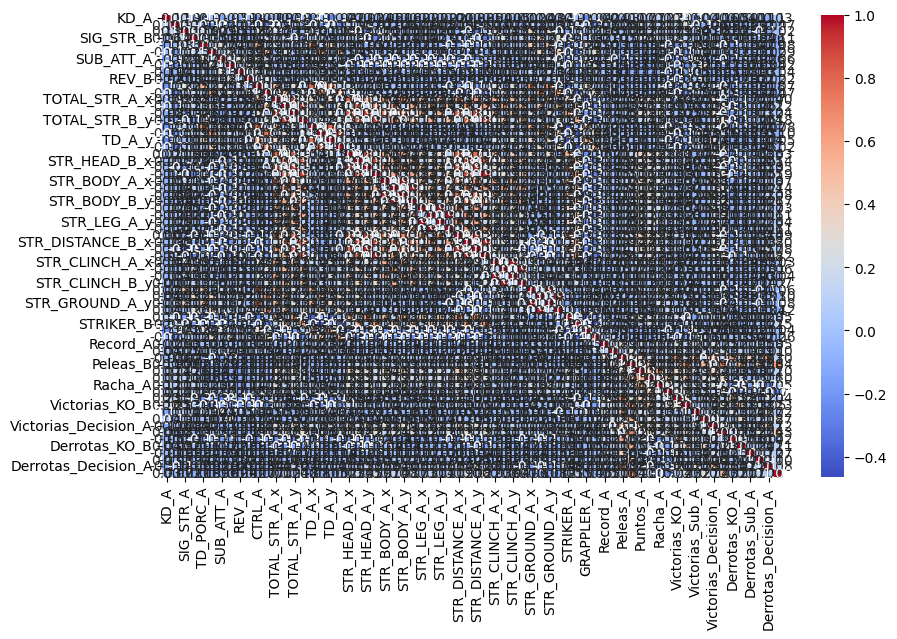

In [5]:
cor = train.drop(columns=['DATE','Peleador_A','Peleador_B','WINNER'])
plt.figure(figsize=(10, 6))
sns.heatmap(cor.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [6]:
def train_decision_tree_grid(X_train, y_train, X_val, y_val):
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Definir modelo base
    dt = DecisionTreeClassifier(random_state=42)

    # Cuadrícula de hiperparámetros
    param_grid = {
        'criterion': ['gini', 'entropy'],  # Función para medir la calidad de la división
        'max_depth': [5, 10, 15, 20],  # Profundidad máxima del árbol
        'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
        'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en una hoja
        'class_weight': [None, class_weight_dict]  # Ajuste de pesos por clase
    }

    #f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda de hiperparámetros con validación cruzada
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        scoring="accuracy",  # Sale mejor priorizando accuracy que 'f1_scorer'
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    # Entrenar el modelo
    grid_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", grid_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = grid_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    return grid_search.best_estimator_

In [7]:
X_train = train.drop(columns=["DATE","Peleador_A","Peleador_B", "WINNER", "STR_DISTANCE_A_x","STR_DISTANCE_A_y"])
y_train = train['WINNER']
X_val = val.drop(columns=["DATE","Peleador_A","Peleador_B","WINNER", "STR_DISTANCE_A_x","STR_DISTANCE_A_y"])
y_val = val['WINNER']
#"STR_DISTANCE_A_x" y "STR_DISTANCE_A_y" las quitamos porque como se ve en la matriz de correlación, están correlacionadas con otras variables. (El modelo mejora sin ellas)

#scaler = MinMaxScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_val_normalized = scaler.transform(X_val)
#no mejora normalizando los datos


tree = train_decision_tree_grid(X_train, y_train, X_val, y_val)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.56      0.83      0.67       277
        True       0.58      0.27      0.37       244

    accuracy                           0.57       521
   macro avg       0.57      0.55      0.52       521
weighted avg       0.57      0.57      0.53       521



In [8]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = tree.predict(X_val)
y_val_prob = tree.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)
print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")
print(confusion_matrix(y_val, y_val_pred))


-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.5662188099808061
F1-Score: 0.3687
AUC-ROC: 0.5561
Precisión: 0.5789
Sensibilidad: 0.2705
Log-loss: 1.1741373335220855
[[229  48]
 [178  66]]


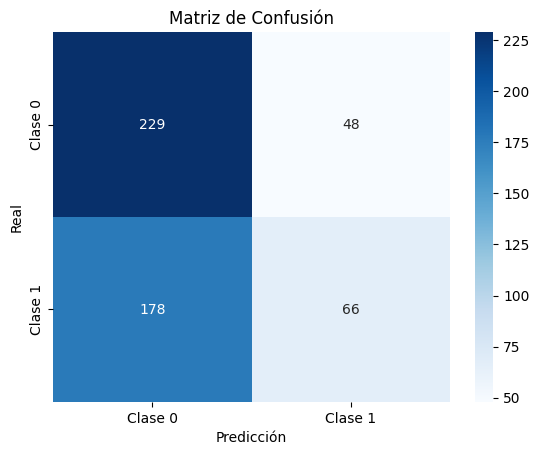

In [9]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [10]:
def train_decision_tree_random(X_train, y_train, X_val, y_val):
    # Calcular pesos de clase para manejar desbalance de datos
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

    # Definir modelo base
    dt2 = DecisionTreeClassifier(random_state=42, class_weight=class_weight_dict)

    # Distribución de hiperparámetros para búsqueda aleatoria
    param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [int(x) for x in np.arange(3, 30, 3)],
    "min_samples_split": [int(x) for x in np.arange(2, 20, 2)],
    "min_samples_leaf": [int(x) for x in np.arange(1, 20, 2)],
    "max_features": ["sqrt", "log2", None],
    "splitter": ["best", "random"],
    }
    #  ['ccp_alpha', 'class_weight', 'max_leaf_nodes', 'min_impurity_decrease',
    #  'min_weight_fraction_leaf', 'monotonic_cst', 'random_state']  otros posibles parámetros

    # Definir la métrica de optimización como el F1-score macro
    f1_scorer = make_scorer(f1_score, average='macro')

    # Búsqueda con validación cruzada
    random_search = RandomizedSearchCV(
        estimator=dt2,
        param_distributions=param_dist,
        scoring=f1_scorer,
        n_iter=50,
        cv=5,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )


    # Entrenar el modelo
    random_search.fit(X_train, y_train)

    # Imprimir mejores parámetros
    print("Mejores parámetros:", random_search.best_params_)

    # Evaluar el mejor modelo en el conjunto de validación
    y_pred = random_search.best_estimator_.predict(X_val)
    print("Reporte de clasificación:")
    print(classification_report(y_val, y_pred))

    return random_search.best_estimator_

In [11]:
print("-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --")
tree2 = train_decision_tree_random(X_train,y_train,X_val,y_val)

-- Entrenamiento usando ajuste de hiperparámetros con RandomizedSeachCV --
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'splitter': 'best', 'min_samples_split': 16, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'gini'}
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.55      0.43      0.48       277
        True       0.48      0.60      0.53       244

    accuracy                           0.51       521
   macro avg       0.52      0.52      0.51       521
weighted avg       0.52      0.51      0.51       521



In [12]:
print("-- Métricas del modelo con hiperparámetros ajustados --")
y_val_pred = tree2.predict(X_val)
y_val_prob = tree2.predict_proba(X_val)[:,1]
print("Accuracy:", accuracy_score(y_val, y_val_pred))
f1_val = f1_score(y_val, y_val_pred)
roc_auc_val = roc_auc_score(y_val, y_val_prob)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val,y_val_prob)

print(f"F1-Score: {f1_val:.4f}")
print(f"AUC-ROC: {roc_auc_val:.4f}")
print(f"Precisión: {precision_val:.4f}")
print(f"Sensibilidad: {recall_val:.4f}")
print(f"Log-loss: {log_loss_val}")
print(confusion_matrix(y_val, y_val_pred))



-- Métricas del modelo con hiperparámetros ajustados --
Accuracy: 0.510556621880998
F1-Score: 0.5338
AUC-ROC: 0.5328
Precisión: 0.4818
Sensibilidad: 0.5984
Log-loss: 0.7862631702007166
[[120 157]
 [ 98 146]]


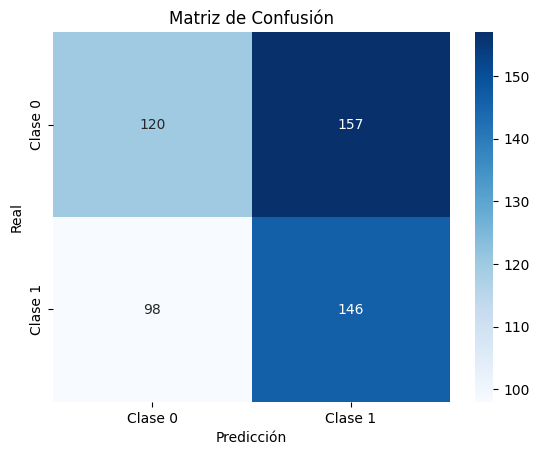

In [13]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

En este caso vemos que el modelo de Random Search es mejor que el de Grid Search.